Импортируем нужные библиотеки

In [17]:
import plotly.express as px
# это бесплатная графическая библиотека, позволяющая создавать визуализации данных.
import pandas as pd
import osmnx as ox
# это библиотека геопространственных данных OpenStreetMap
import geopandas as gpd
# это библиотека для обработки и анализа геоданных с использованием привычных для Pandas структур данных
from geopy.geocoders import Nominatim
# это библиотека, которая предоставляет удобный способ работать с геоданными
import matplotlib.pyplot as plt

In [26]:
def map(df):
    #  функция для показа карты
    fig = px.scatter_map(df, lat="lat", lon="lon", hover_name="name",
                            color_discrete_sequence=["red"], zoom=10, height=300)
    fig.update_layout(map_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

Пример работы для одной координаты

Документация:
- https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scattermap.html
- https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
  
1. Figure может быть представлена как в виде словаря, так и в виде экземпляров plotly.graph_objects.Figure, и перед передачей в plotly.js они сериализуются как JSON.
2. Scattermap — это класс в библиотеке Plotly, который представляет собой низкоуровневый интерфейс для работы с фигурами, трассировками и макетом. Данные, визуализируемые в виде точек, линий или маркеров на географической карте MapLibre GL, представлены парами координат долготы и широты в lon и lat.
   

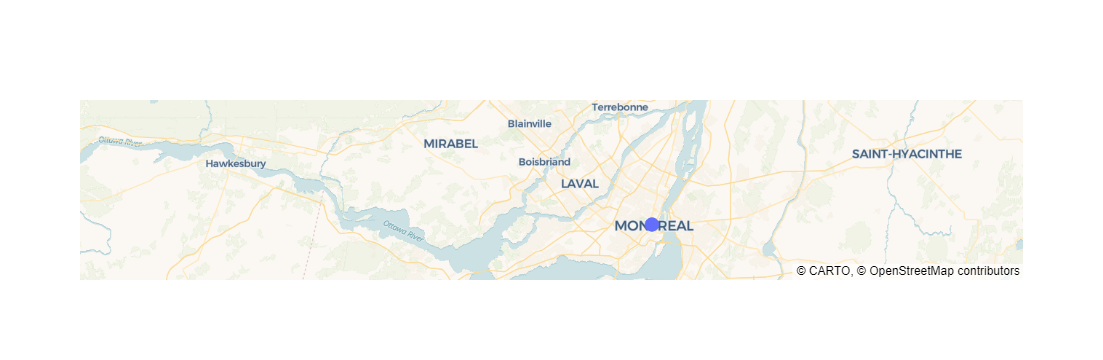

In [16]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermap(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermap.Marker(
            size=15
        ),
        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    map=dict(
        bearing=0,
        center=go.layout.map.Center(
            lat=45.5,
            lon=-73.6
        ),
        zoom=7
    )
)

fig.show()

In [24]:
def plot_nearby_places(address, distance=500):
    # Инициализируем геоколлектор
    geolocator = Nominatim(user_agent="i2d")

    # Получаем координаты по адресу
    location = geolocator.geocode(address)
    if location is None:
        print("Не удалось найти адрес.")
        return

    # Получаем координаты
    latitude = location.latitude
    longitude = location.longitude

    
    # Находим заведения поблизости
    tags = {'amenity': True}
    nearby_places = ox.features.features_from_point((latitude, longitude), dist=distance, tags=tags)
    data_lon = []
    data_lat = []
    nearby_places = nearby_places[['name', 'geometry']]
    n_p = nearby_places.copy(deep=True)
    indexes_to_del = []
    for i, r in nearby_places.iterrows():
        # print((r['geometry']))
        if str(r['geometry']).startswith("POINT"):
            x,y = r['geometry'].x,r['geometry'].y
            data_lon.append(x)
            data_lat.append(y)
        else:
            indexes_to_del.append(i)
            
    n_p = nearby_places.drop(indexes_to_del)
    n_p['lon'] = data_lon
    n_p['lat'] = data_lat
        

    print(n_p)
    map(n_p)

                                  name                   geometry        lon  \
element_type osmid                                                             
node         529550640             ВТБ  POINT (37.61398 55.75714)  37.613981   
             784052391             NaN  POINT (37.61735 55.75486)  37.617345   
             1074714681   Фестивальное  POINT (37.62266 55.75453)  37.622660   
             1074714701            NaN  POINT (37.62280 55.75402)  37.622805   
             1074714713   Столовая №57  POINT (37.62336 55.75421)  37.623361   
...                                ...                        ...        ...   
             12198973957      Öz kebab  POINT (37.62745 55.75709)  37.627445   
             12273425606    Varvarka 3  POINT (37.62623 55.75374)  37.626226   
             12292422363        Kurnik  POINT (37.62203 55.75515)  37.622030   
             12309870577           NaN  POINT (37.62134 55.75704)  37.621337   
             12309870596           NaN  

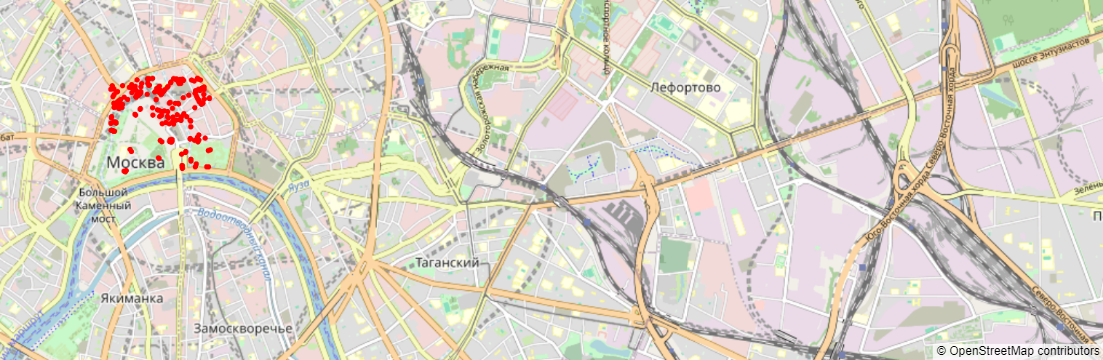

In [25]:
plot_nearby_places("Россия, Москва, Красная Площадь")

In [3]:
from IPython.display import HTML, display

html = """<!DOCTYPE html>
<html>
    <head>
        <title>Пример с интерактивной картой</title>
    </head>
    <body>
        <div style="width: 300px; height: 200px;">
            <script type="text/javascript" charset="utf-8" src="https://api-maps.yandex.ru/services/constructor/1.0/js/?um=constructor%3A053bd947d462cc1a45aeba4070defff75501905071c0eaf68436ac9976ec698c&amp;width=514&amp;height=326&amp;lang=ru_RU&amp;"></script>
        </div>
    </body>
</html>
"""

display(HTML(html))

In [14]:
from requests import get

s = "%".join(input().split())
r = f"https://yandex.ru/maps/213/russia/search/{s}/"
print(r)
print(get(r).text)

 отель 999 крым


https://yandex.ru/maps/213/russia/search/отель%999%крым/
<!doctype html><html prefix="og: http://ogp.me/ns#" lang="ru"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1">
    <link rel="icon" href="https://yastatic.net/s3/home-static/_/a6/a6a296b741b51880ae8a9b04a67cfe3f.png" sizes="16x16">
    <link rel="icon" href="https://yastatic.net/s3/home-static/_/f4/f47b1b3d8194c36ce660324ab55a04fe.png" sizes="32x32">
    <link rel="icon" href="https://yastatic.net/s3/home-static/_/f0/f0597b6727cc67dceebc4e3a87caf571.png" sizes="192x192">
    <link rel="apple-touch-icon" href="https://yastatic.net/s3/home-static/_/a7/a79b81aa025e9edb2244e38581c868ad.png" sizes="152x152">
    <link rel="apple-touch-icon" href="https://yastatic.net/s3/home-static/_/46/462e92b9e3792be37a1c3fdefb26af28.png" sizes="180x180">
<title data-react-helmet="true">ÐÑ Ð½Ðµ ÑÐ¾Ð±Ð¾Ñ?</title><meta data-react-helmet="true" property="o

In [1]:
import plotly.express as px
# это бесплатная графическая библиотека, позволяющая создавать визуализации данных.
import pandas as pd
import osmnx as ox
# это библиотека геопространственных данных OpenStreetMap
import geopandas as gpd
# это библиотека для обработки и анализа геоданных с использованием привычных для Pandas структур данных
from geopy.geocoders import Nominatim
# это библиотека, которая предоставляет удобный способ работать с геоданными
import matplotlib.pyplot as plt

Переделаем функцию для нахождения мест поблизости. Она берет координаты и находит по ним координаты близлежащих мест.

In [2]:
def lon_and_lat(cords, distance=500):
    # Инициализируем геоколлектор
    geolocator = Nominatim(user_agent="i2d")
    
    latitude,longitude = list(map(float,cords.split(', ')))
    

    
    # Находим заведения поблизости
    
    try:
        print((latitude, longitude))
        tags = {'amenity': True}
        nearby_places = ox.features.features_from_point((latitude, longitude), dist=distance, tags=tags)
        #print(nearby_places)
        if nearby_places.empty:
            return None
        data_lon = []
        data_lat = []
        nearby_places = nearby_places[['name', 'geometry']]
        n_p = nearby_places.copy(deep=True)
        indexes_to_del = []
        for i, r in nearby_places.iterrows():
            # print((r['geometry']))
            if str(r['geometry']).startswith("POINT"):
                x,y = r['geometry'].x,r['geometry'].y
                data_lon.append(x)
                data_lat.append(y)
            else:
                indexes_to_del.append(i)
                
        n_p = nearby_places.drop(indexes_to_del)
        n_p['lon'] = data_lon
        n_p['lat'] = data_lat
            
    
        
        result = list(zip(n_p['lat'],n_p['lon']))
        result.append((latitude, longitude))
        
        return result
    except Exception as e:
        print(e)
        return None
        

In [3]:
near_places = lon_and_lat("59.148141, 37.942938")


(59.148141, 37.942938)


In [9]:
near_places = lon_and_lat("56.737680, 37.166210")

(56.73768, 37.16621)


Функция make_href_for_places делает ссылку на Яндекс карты по меткам и месту отеля.

In [11]:
def make_href_for_places(near_places):
    places,hotel = near_places[:-1], near_places[-1]
    pt = '~'.join([f"{el[1]},{el[0]}" for el in places])
    href = f'https://yandex.ru/maps/?ll={hotel[1]},{hotel[0]}&pt={pt}&z=16&l=map'
    return href



In [10]:
print(make_href_for_places(near_places))

https://yandex.ru/maps/?ll=37.16621,56.73768&pt=37.1584613,56.7373683~37.1595933,56.7353196~37.1621347,56.7358505~37.1614903,56.7358009~37.1657834,56.7374887~37.1663416,56.7383963~37.1704402,56.7371095~37.1606651,56.7345604~37.1648293,56.7370966~37.1598778,56.7351194~37.168315,56.740945~37.1615569,56.7349052~37.1655253,56.7386503~37.1613371,56.7357913~37.1590017,56.7353745~37.1655954,56.7374064~37.167497,56.7382317~37.1679564,56.7390894~37.1684579,56.7393156~37.1698191,56.7373104~37.1653212,56.7392508~37.1594981,56.7353903~37.1680313,56.7402717~37.1650148,56.7370831~37.1677477,56.7405096~37.1637548,56.7345275~37.168776,56.7394169~37.167087,56.7380517~37.166154,56.7376408~37.1689534,56.7393891~37.1653257,56.7380707~37.1696337,56.7413586~37.170116,56.739013~37.1622543,56.735798~37.1633899,56.7347193~37.1613809,56.735783~37.1601459,56.7357413~37.1686816,56.7383286~37.1638352,56.7334422~37.1615977,56.735454~37.1582807,56.7352789~37.1671282,56.7387131~37.1631781,56.7390952~37.163752,56.7346

Проблема способа выше: показывает какие-то непонятные метки, которые не несут особой информации. Они указывают на дом, где есть что-то интересное, но не всегда там что-то есть и не метки не интерактивны.

In [30]:
def make_href_for_hotel(hotel):
    pt = f"{hotel[1]},{hotel[0]}"
    href = f'https://yandex.ru/maps/?ll={hotel[1]},{hotel[0]}&text=кафе&pt={pt}&z=16&l=map'
    return href

In [31]:
print(make_href_for_hotel((56.73768, 37.16621)))

https://yandex.ru/maps/?ll=37.16621,56.73768&text=кафе&pt=37.16621,56.73768&z=16&l=map


Получаем ссылку, по которой яндекс ищет кафе